In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from pytrends.request import TrendReq
pytrend = TrendReq()

kw_list = ['"Canon" "mirrorless"', '"Nikon" "mirrorless"', '"Sony" "mirrorless"']

In [ ]:
class Trend:
    # Required:
        # import pandas as pd
        # import pickle
        # import matplotlib.pyplot as plt
        # from pytrends.request import TrendReq
        # pytrend = TrendReq()
        
    def __init__(self, year, month, kwList):
        self.year = year
        self.month = month
        self.kwList = kwList

    def monthEndDate(self):
        switcher = {
            1: 31,
            2: 28,
            3: 31,
            4: 30,
            5: 31,
            6: 30,
            7: 31,
            8: 31,
            9: 30,
            10: 31,
            11: 30,
            12: 31,
        }
        if ((self.year%4 == 0) and (self.month == 2)):
            switcher[2] = 29
        return switcher.get(self.month)

    def timeframe(self):
        date_start = str(self.year) + '-' + str(self.month) + '-01'
        date_end = str(self.year) + '-' + str(self.month) + "-" + str(self.monthEndDate())
        return date_start + ' ' + date_end

    def crawl(self):
        pytrend.build_payload(self.kwList, timeframe=self.timeframe())
        self.trend = (pytrend.interest_by_region()).reset_index()
        
    def toPickle(self, keyword, path):
        monthStr = '0' + str(self.month) if self.month < 10 else str(self.month)
        fileName = str(self.year) + '-' + monthStr + '-' + str(keyword)
        pathName = str(path) + '/' + fileName + '.pkl'
        with open(pathName, 'wb') as f:
            pickle.dump(self.trend, f)

    def preview(self):
        print("Head:")
        print(self.trend.head(10))
        print("..............................")
        print("Tail:")
        print(self.trend.tail(10))
    
    def hist(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.hist((self.trend).iloc[:, i], range=(0,100), bins=10, alpha=0.3, label=(self.trend).columns[i])
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    def scatter(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.scatter(x=(self.trend).index, y=(self.trend).iloc[:, i], s=4, alpha=0.5, label=(self.trend).columns[i])
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylim(0, 100)
        plt.ylabel('Trending index')
        plt.legend()
        plt.show()


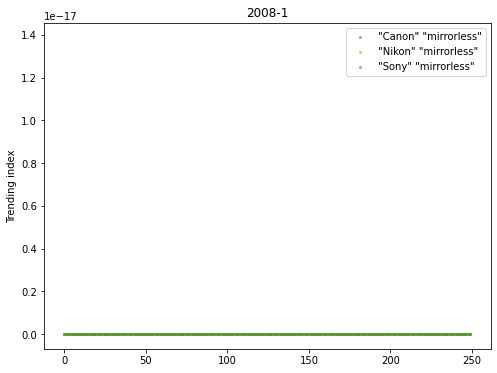

2008-1: DONE


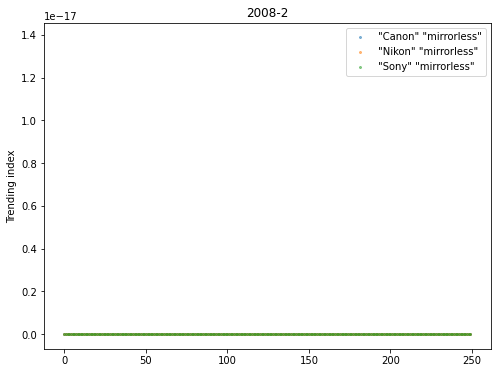

2008-2: DONE


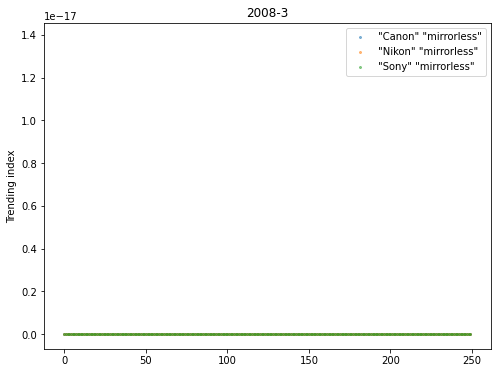

2008-3: DONE


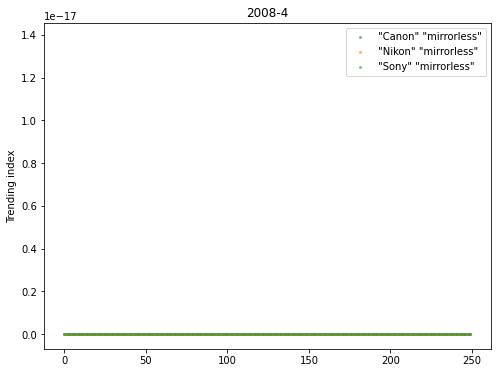

2008-4: DONE


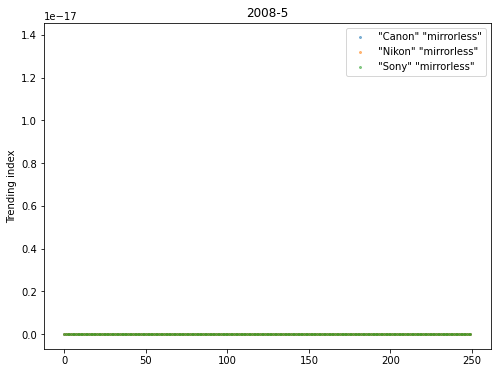

2008-5: DONE


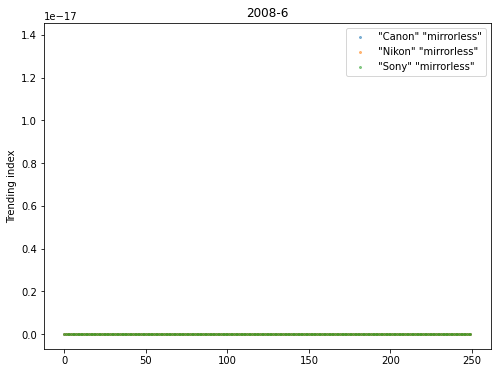

2008-6: DONE


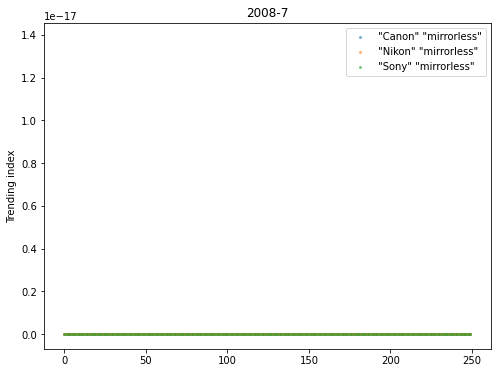

2008-7: DONE


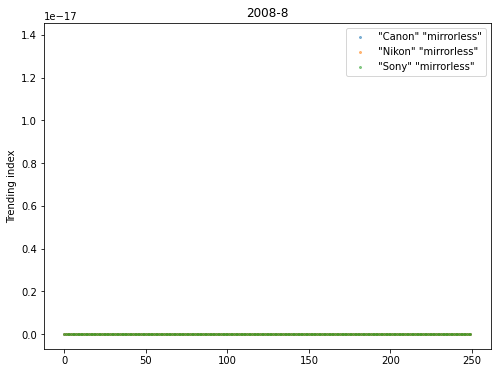

2008-8: DONE


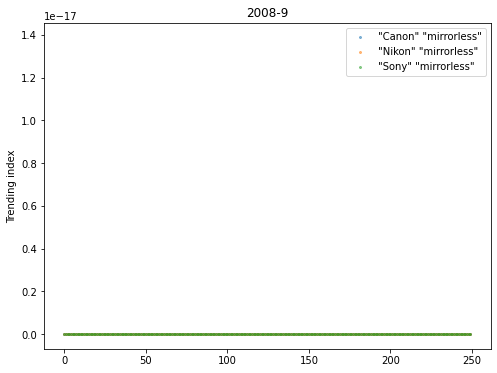

2008-9: DONE


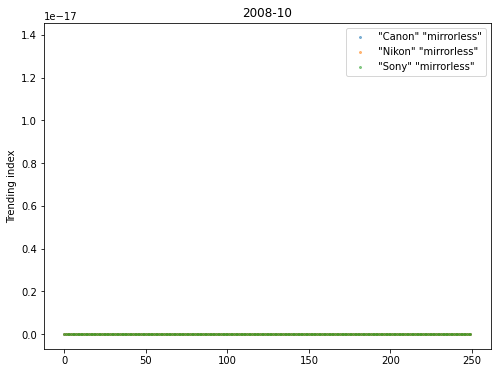

2008-10: DONE


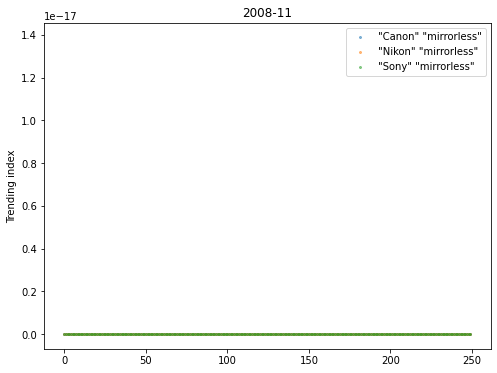

2008-11: DONE


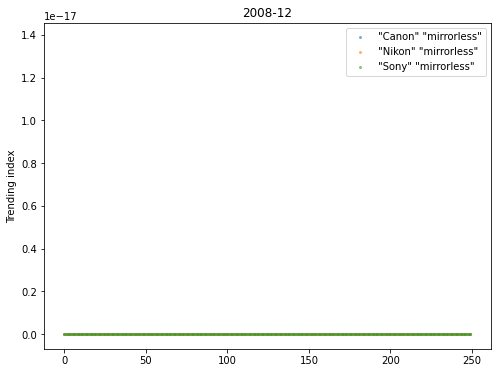

2008-12: DONE


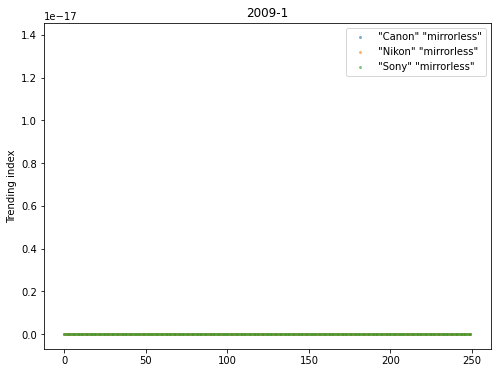

2009-1: DONE


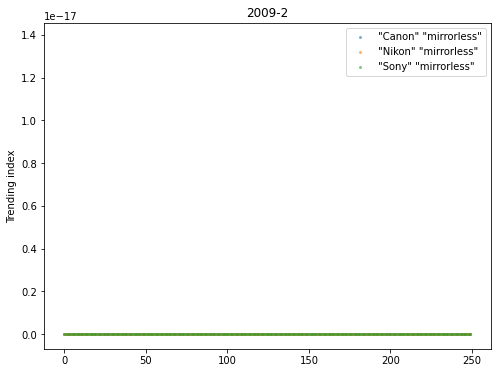

2009-2: DONE


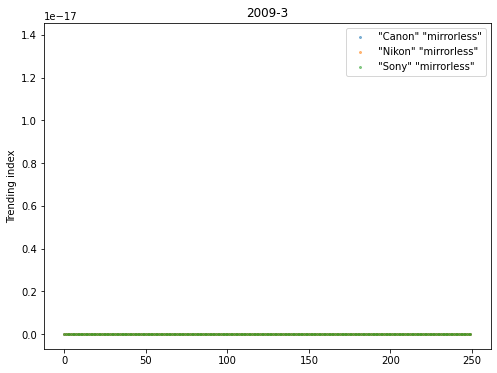

2009-3: DONE


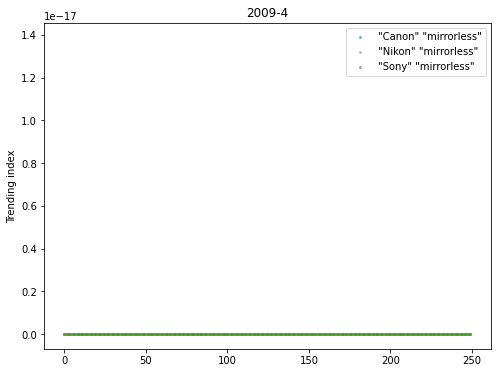

2009-4: DONE


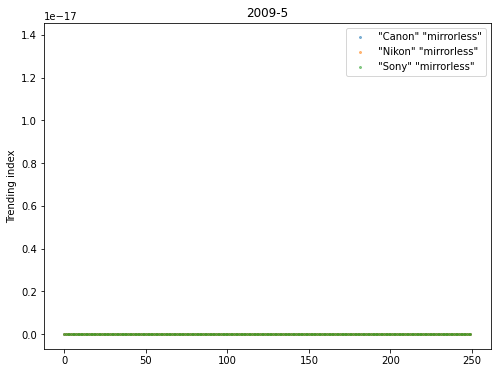

2009-5: DONE


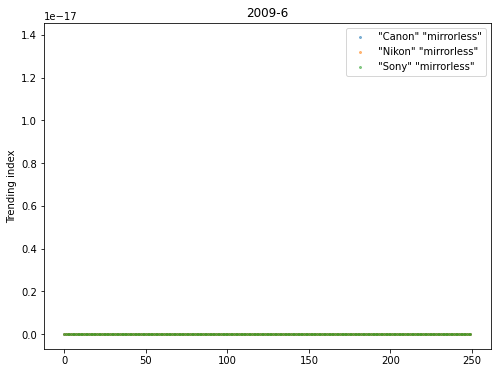

2009-6: DONE


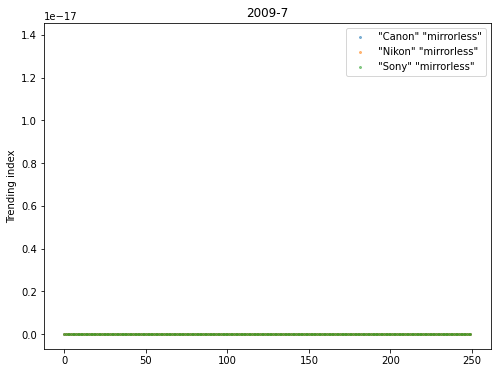

2009-7: DONE


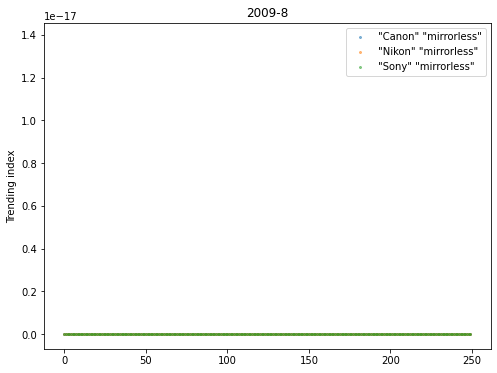

2009-8: DONE


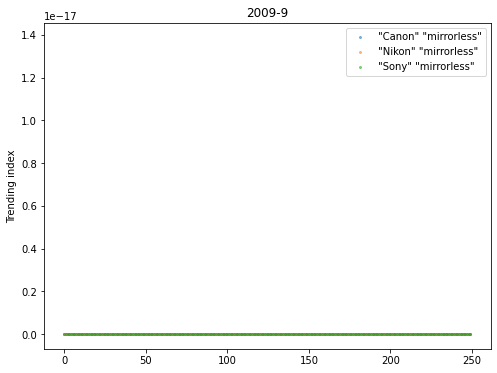

2009-9: DONE


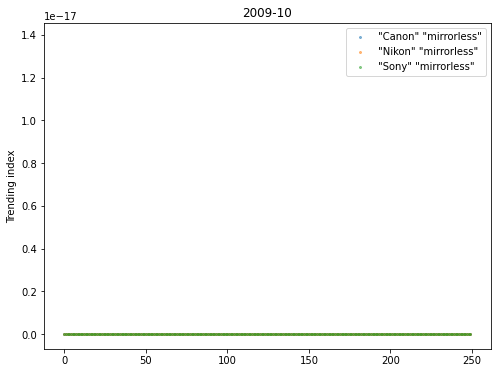

2009-10: DONE


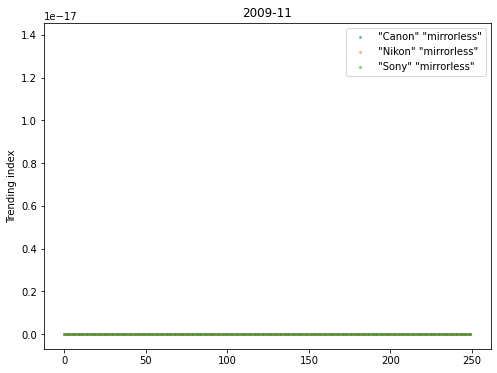

2009-11: DONE


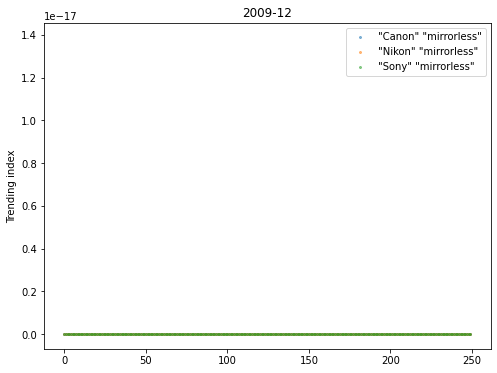

2009-12: DONE


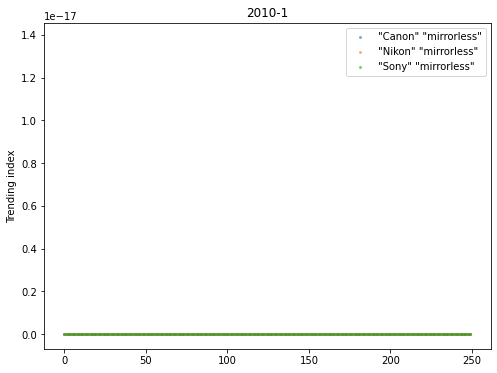

2010-1: DONE


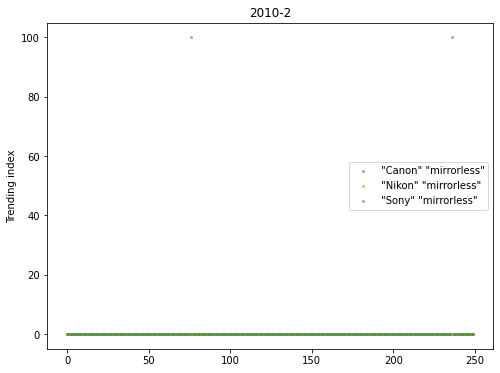

2010-2: DONE


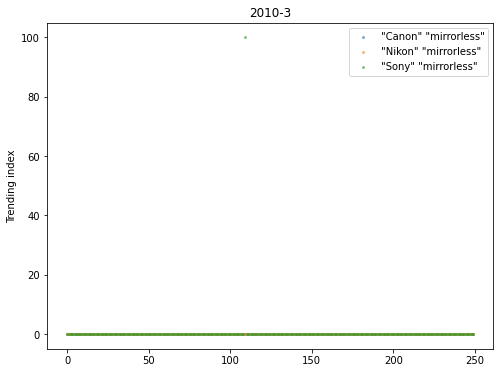

2010-3: DONE


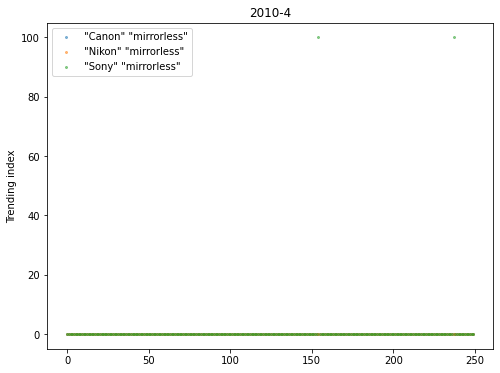

2010-4: DONE


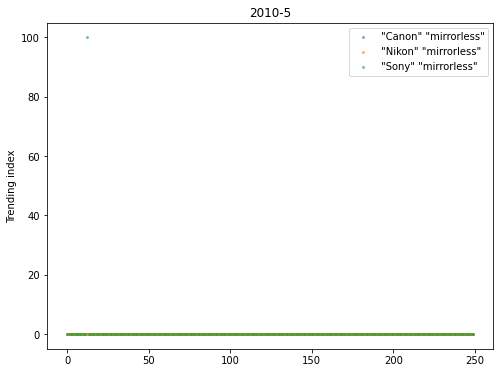

2010-5: DONE


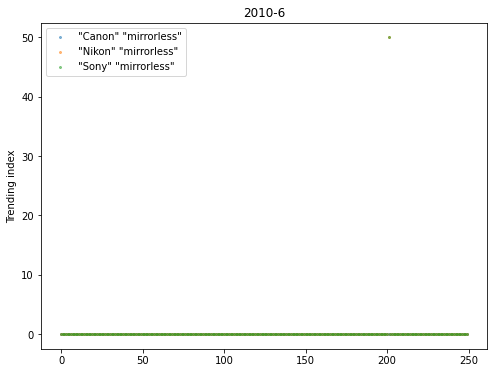

2010-6: DONE


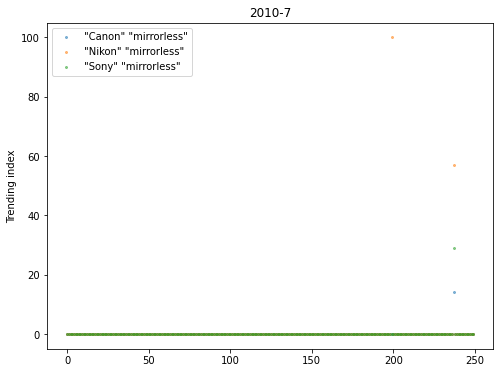

2010-7: DONE


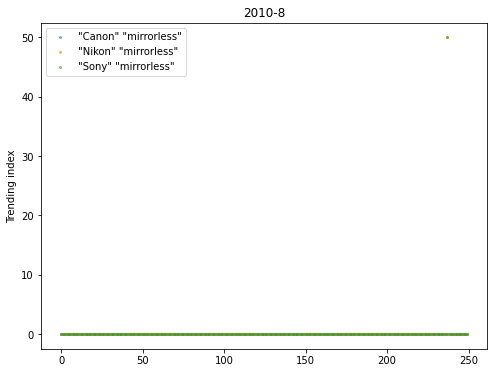

2010-8: DONE


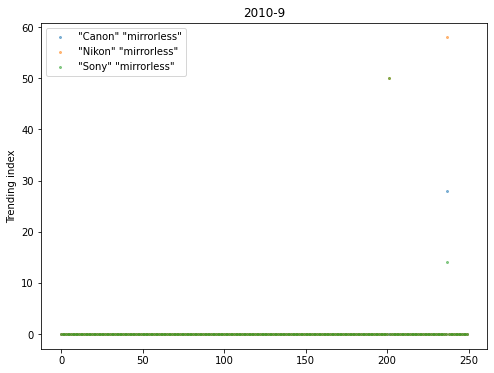

2010-9: DONE


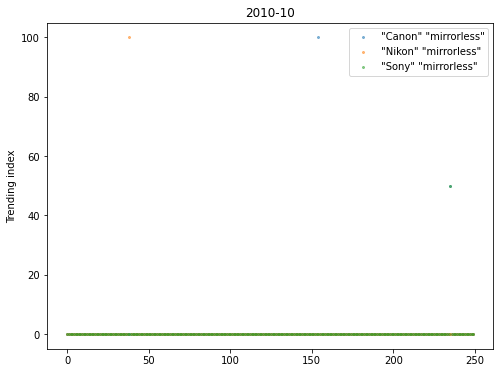

2010-10: DONE


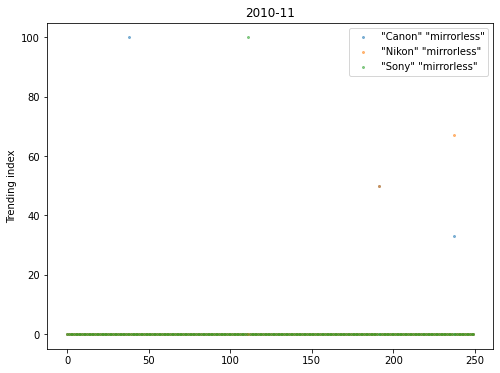

2010-11: DONE


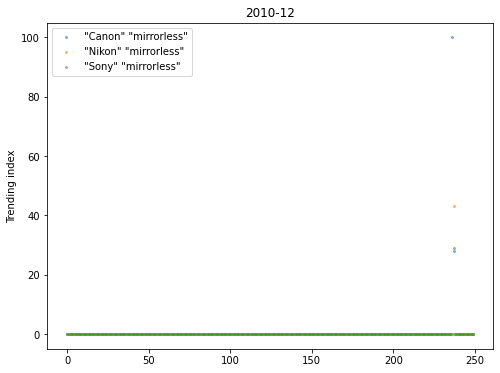

2010-12: DONE


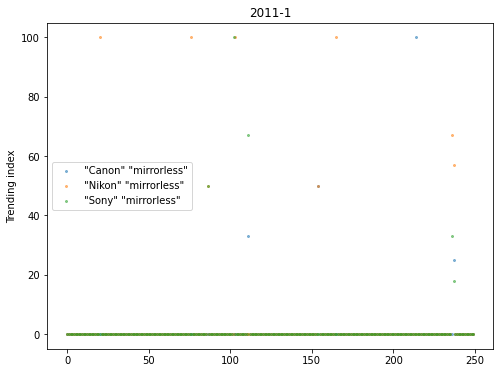

2011-1: DONE


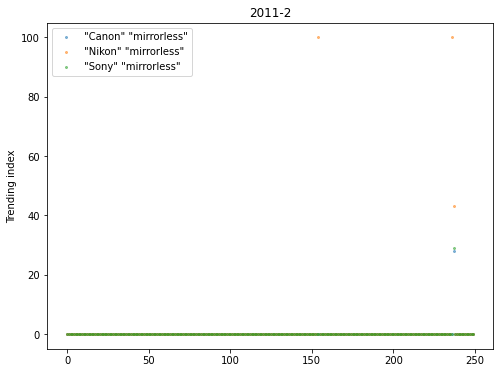

2011-2: DONE


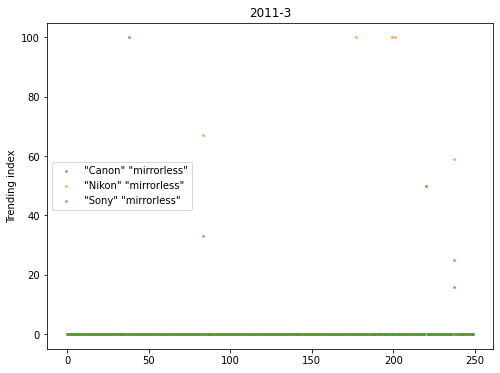

2011-3: DONE


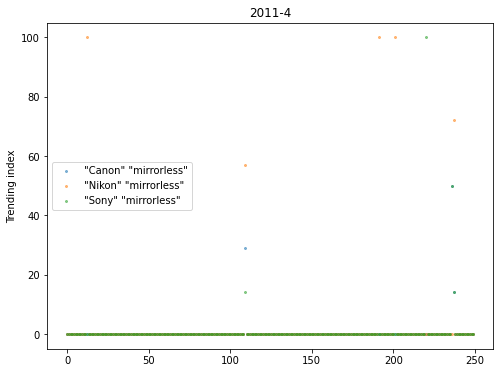

2011-4: DONE


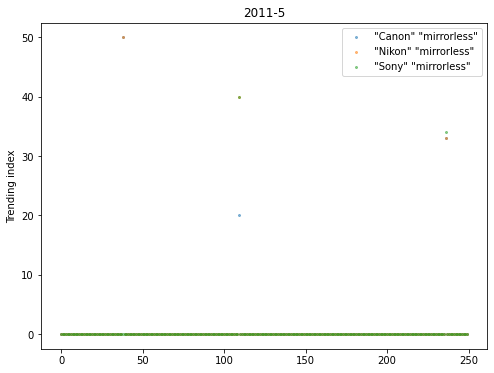

2011-5: DONE


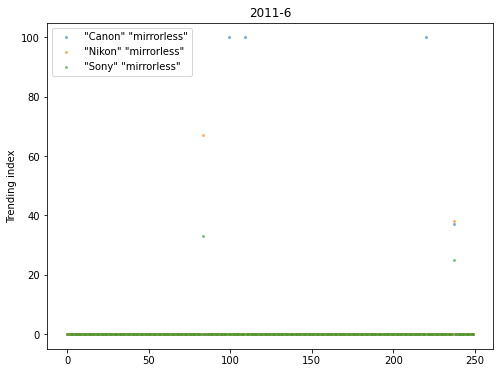

2011-6: DONE


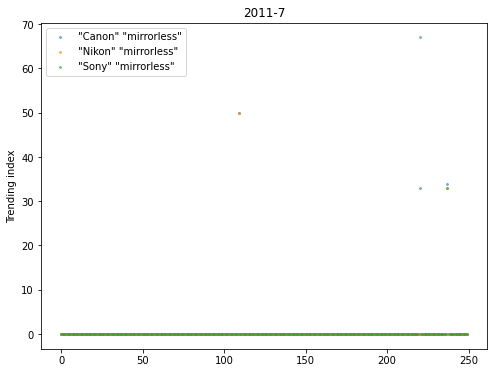

2011-7: DONE


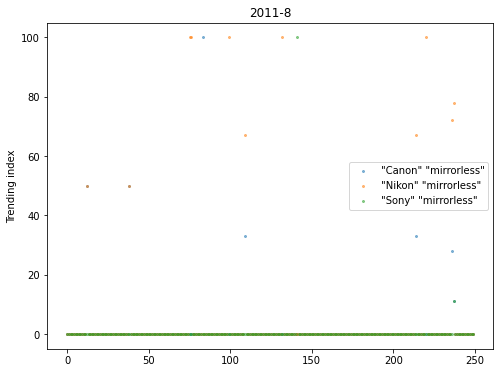

2011-8: DONE


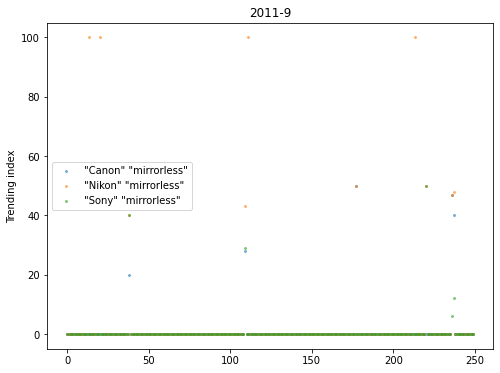

2011-9: DONE


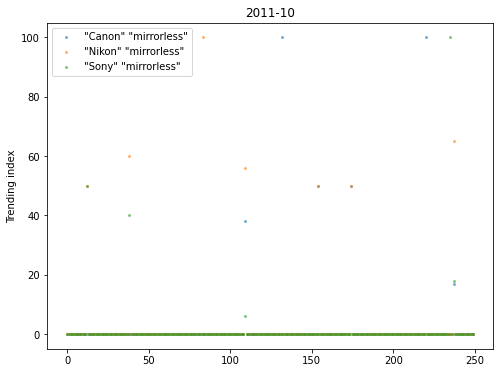

2011-10: DONE


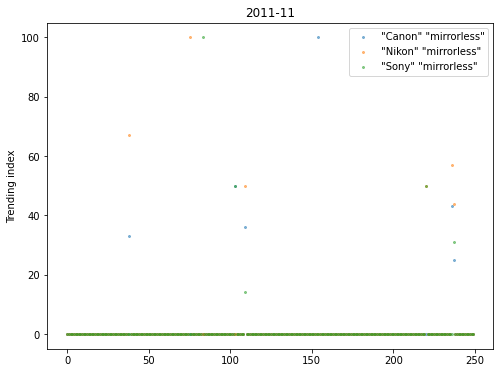

2011-11: DONE


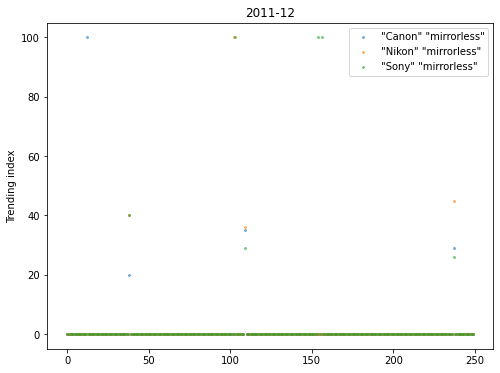

2011-12: DONE


ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)

In [5]:
years = np.arange(2008, 2021)
months = np.arange(1, 13)
for y in years:
    for m in months:
        if (y == 2020 and m>3):
            break
        t = Trend(y, m, kw_list)
        t.crawl()
        t.toPickle('mirrorless', 'data/raw/mirrorless')
        t.scatter()
        print(str(y) + '-' + str(m) + ': DONE')
        time.sleep(3)  # in seconds